In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(a.transpose())

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000400.fits
(1100, 1600)
30.0
[{'focus': 30.0, 'r': 32.88898167219538, 'rerr': 9.321361511025328}]


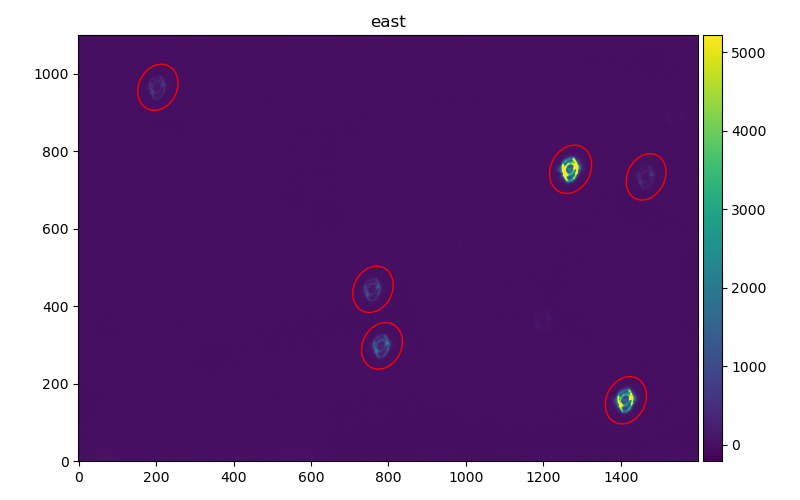

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000401.fits
(1100, 1600)
31.0
[{'focus': 31.0, 'r': 28.07917011584607, 'rerr': 9.247930061700046}]


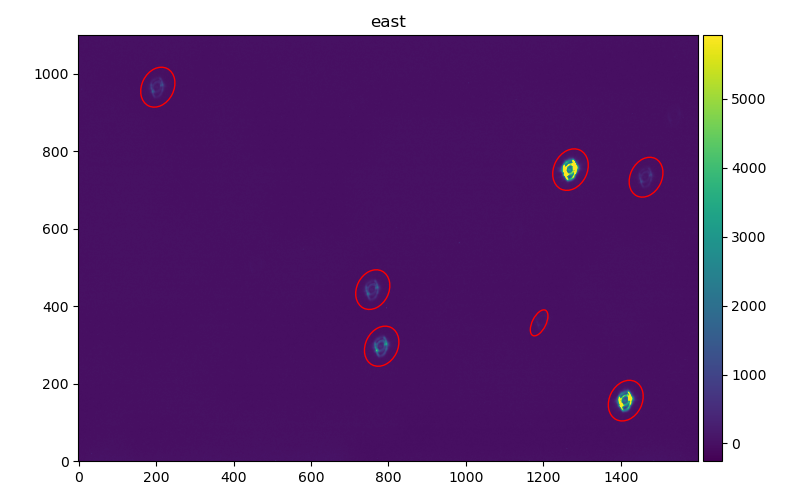

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000402.fits
(1100, 1600)
32.0
[{'focus': 32.0, 'r': 23.74872825632302, 'rerr': 8.712931381897462}]


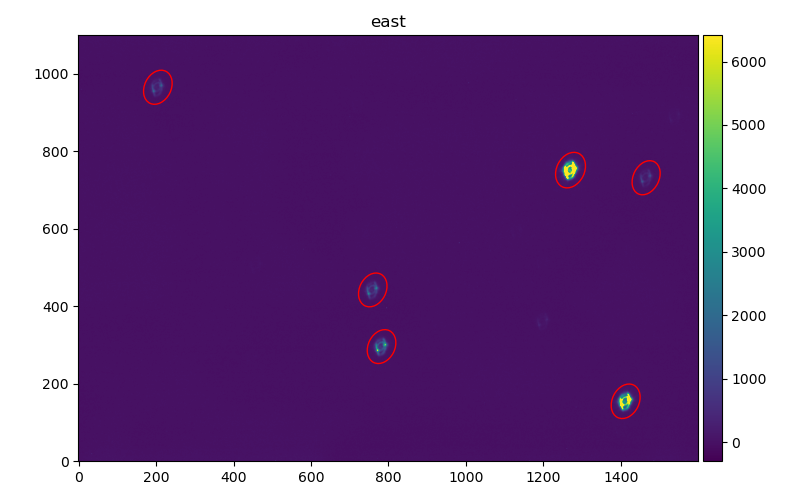

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000403.fits
(1100, 1600)
33.0
[{'focus': 33.0, 'r': 18.35332897359638, 'rerr': 6.434128741995371}]


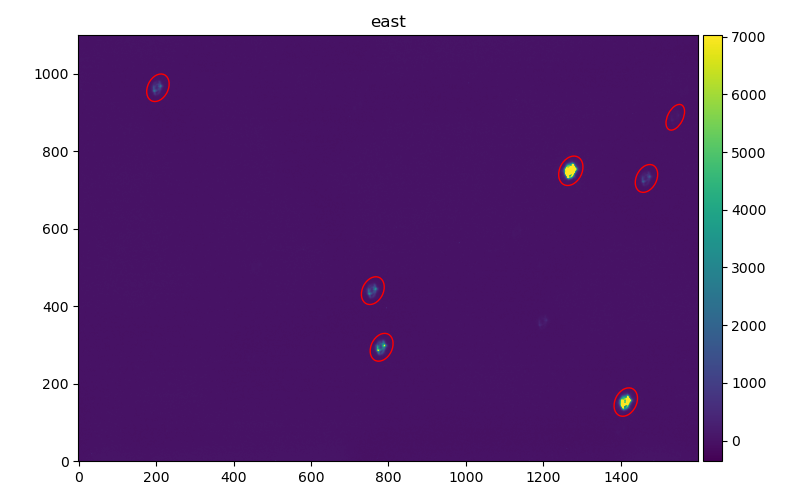

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000404.fits
(1100, 1600)
34.0
[{'focus': 34.0, 'r': 15.585451770163171, 'rerr': 1.8413798986102043}]


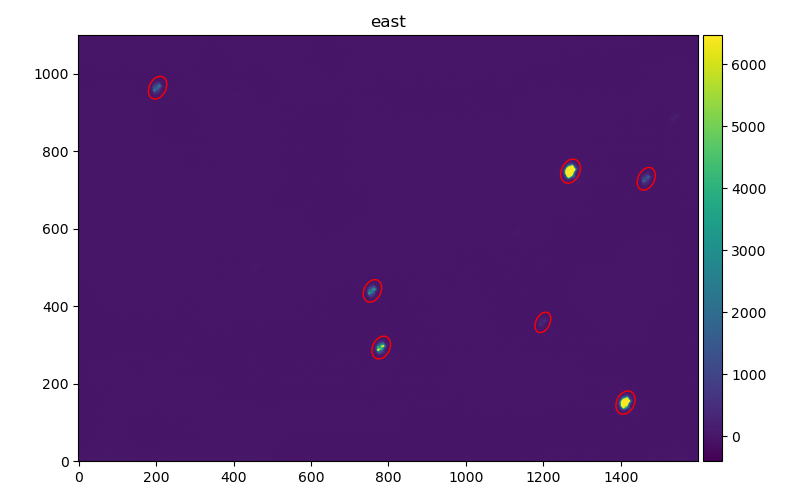

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000405.fits
(1100, 1600)
35.0
[{'focus': 35.0, 'r': 10.733113450603392, 'rerr': 1.9776153099577505}]


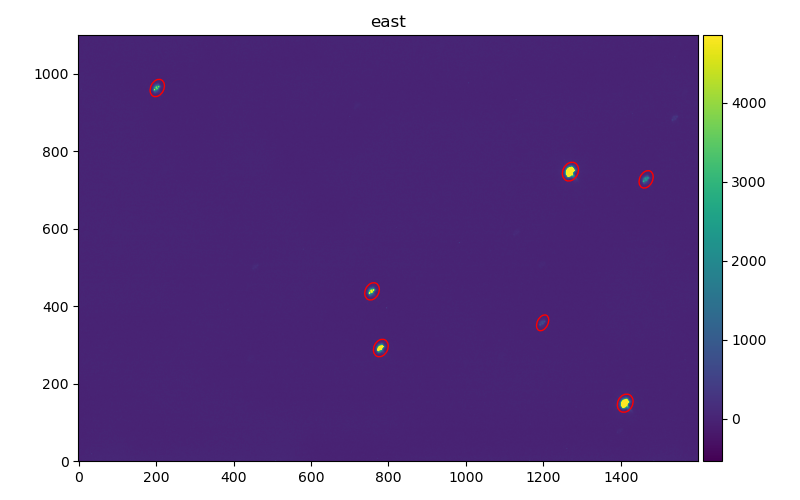

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000406.fits
(1100, 1600)
36.0
[{'focus': 36.0, 'r': 8.876679003930539, 'rerr': 1.967952380600311}]


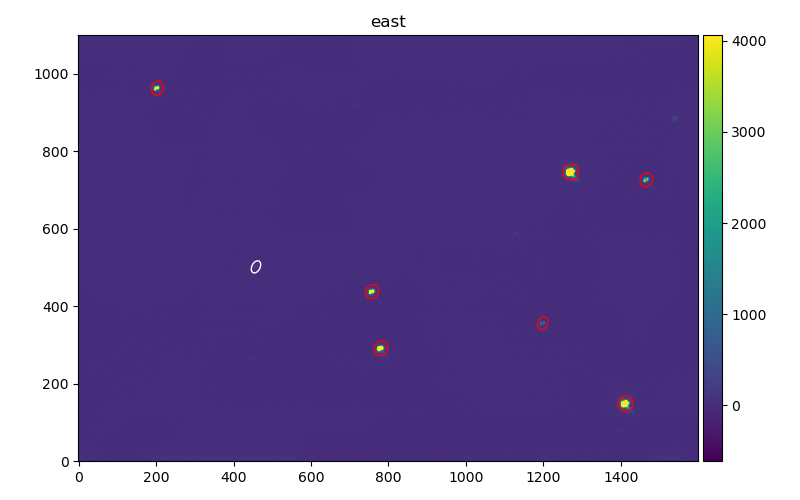

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000407.fits
(1100, 1600)
37.0
[{'focus': 37.0, 'r': 8.532426449179802, 'rerr': 2.89400541861337}]


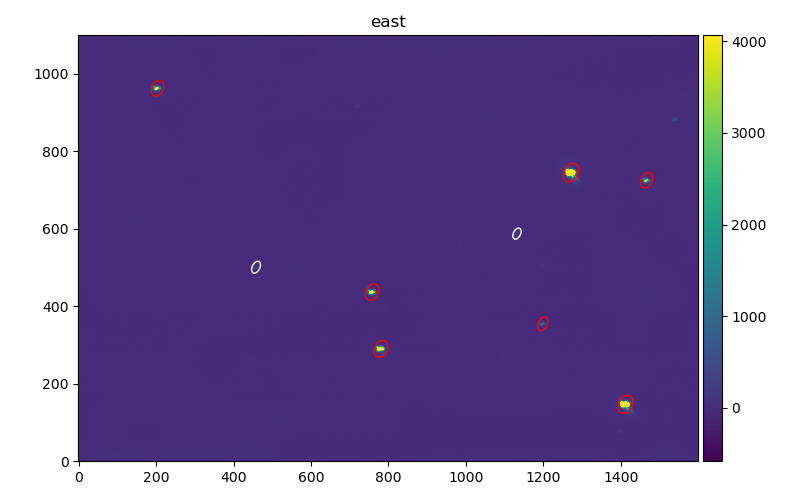

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000408.fits
(1100, 1600)
38.0
[{'focus': 38.0, 'r': 10.407095770287498, 'rerr': 4.536898423838356}]


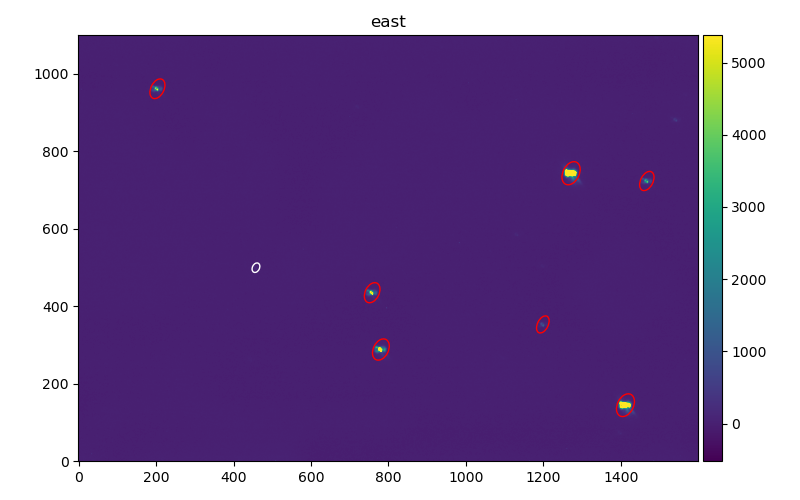

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000409.fits
(1100, 1600)
39.0
[{'focus': 39.0, 'r': 14.120758073611528, 'rerr': 5.768317705383098}]


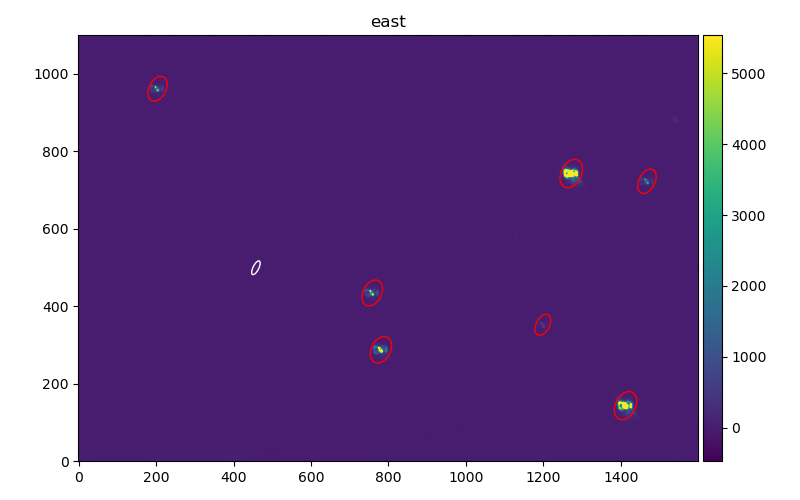

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000410.fits
(1100, 1600)
40.0
[{'focus': 40.0, 'r': 11.645349211728284, 'rerr': 7.913331845304064}]


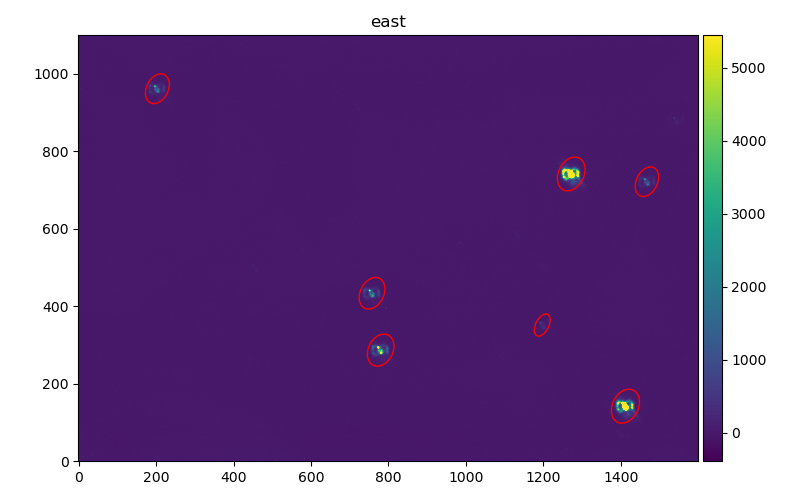

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000411.fits
(1100, 1600)
41.0
[{'focus': 41.0, 'r': 24.727070589461803, 'rerr': 9.492801845765332}]


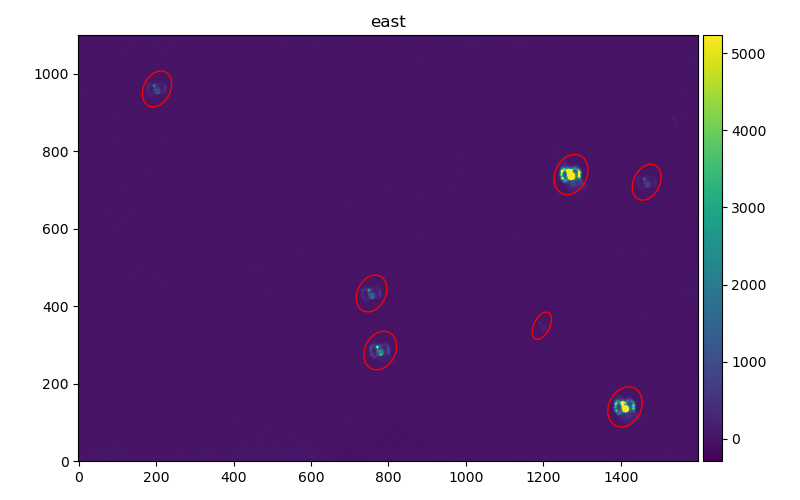

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000412.fits
(1100, 1600)
42.0
[{'focus': 42.0, 'r': 29.030221107337326, 'rerr': 10.931075337823607}]


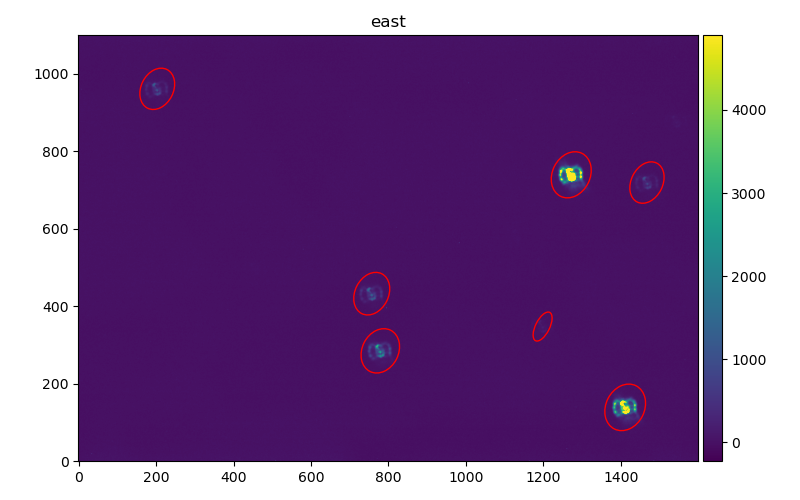

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000413.fits
(1100, 1600)
43.0
[{'focus': 43.0, 'r': 33.64568352819114, 'rerr': 13.687462821013929}]


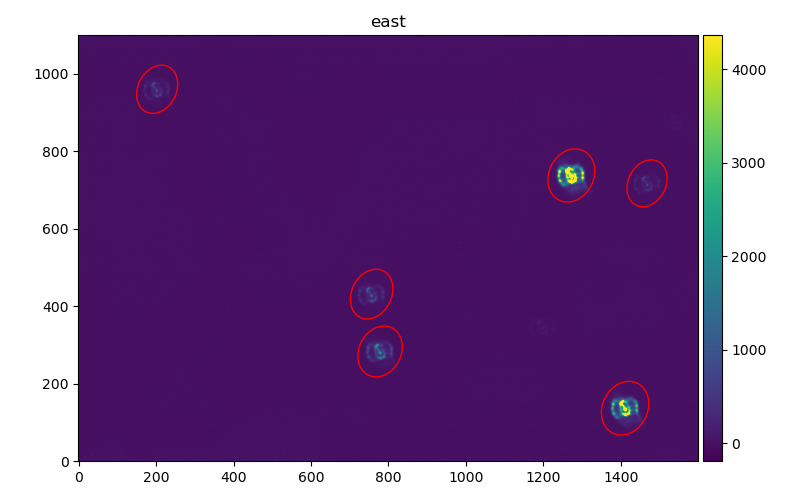

/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_00000414.fits
(1100, 1600)
44.0
[{'focus': 44.0, 'r': 33.26911020676287, 'rerr': 15.155881636579034}]


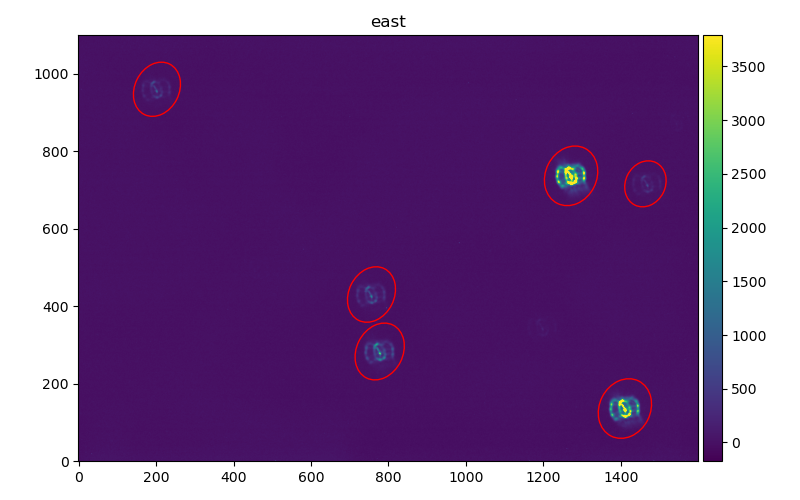

[{'focus': 44.0, 'r': 33.26911020676287, 'rerr': 15.155881636579034}]


<Table length=6>
        x                  y          ...        xwin               ywin       
     float64            float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
1271.7775555073667  736.6877834462352 ...  1270.336018046588  736.2910350761832
1410.7530084123412 135.68699178660324 ... 1409.4899708023079  134.9593394651778
 777.5122333012313 283.01592189910417 ...  776.6234843061748 281.35129127771125
 756.3185326354323 430.18721348654384 ...   755.613998481906  428.2753890719086
 202.2708133733591  960.2074453999824 ...  201.4042879163491  958.5900924364935
1463.7685047731575  715.9884024468901 ... 1467.2439283459578   714.282210273078

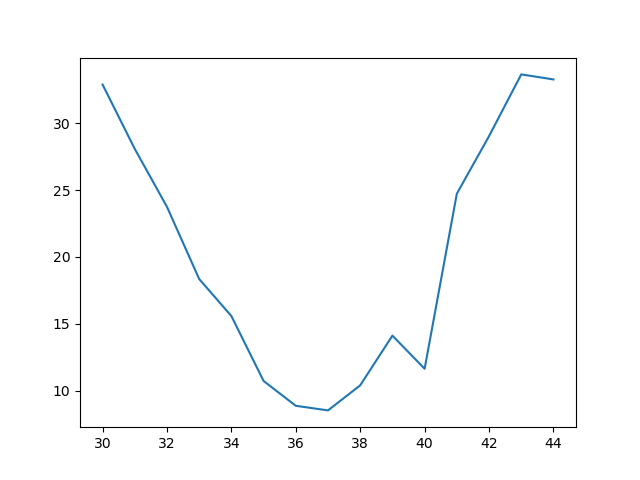

In [2]:
%matplotlib widget
#%matplotlib inline

import numpy as np
import sep
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter

from photutils.datasets import make_100gaussians_image
from photutils.background import Background2D, MedianBackground

from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel

from plotimg import plot_images
from lvmagp.images import Image
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection
from lvmagp.focus.focusseries import ProjectionFocusSeries, PhotometryFocusSeries

from photutils.centroids import centroid_quadratic


deblend_nthresh = 1.4
num_stars = 7


#source_detection = SepSourceDetection()
source_detection = SepSourceDetection(threshold= 3.0, minarea=14.0, deblend_nthresh=deblend_nthresh)

fbase = lambda idx: f"/data/lvm/sci/agcam/east/20221028n/lvm.sci.agcam.east_{idx:08}.fits"

off=390
num=9

#off=392
#num=4


off=400
num=15

#off=357
#num=7

#off=178
#num=2

#off=319
#num=5

#off=124

focusum=[]
sepnum=[]
pfsnum=[]

for i in range(num):
    print(fbase(i+off))
    img_med = img_det = img_sep = Image.from_file(fbase(i+off))
    img_med = img_det = img_sep

#    img_det = await source_detection(img_det)
#    img_det.catalog.sort("peak")
#    img_det.catalog.reverse()
    #print(img_det.catalog[img_det.catalog["fwhm"] > 4.0])
    
    img_med.data = median_filter(img_med.data, size=2)
#    img_med = await source_detection(img_med)
#    img_med.catalog.sort("peak")
#    img_med.catalog.reverse()
    #print(img_med.catalog[img_med.catalog["fwhm"] > 4.0])

    print(img_sep.data.shape)

#    bkg_estimator = MedianBackground()
#    bkg = Background2D(img_med.data.astype(float), (50, 50), filter_size=(3, 3),
#                       bkg_estimator=bkg_estimator)
#    img_sep.data = img_sep.data.astype(float) - bkg.background

#    bkg_median = np.median(bkg.background)
#    bkg_std = np.std(bkg.background)
#    print(f"median {bkg_median}, std {bkg_std}")
    bkg = sep.Background(img_med.data.astype(float))
    img_sep.data = img_sep.data.astype(float) - bkg
    bkg_median = np.median(bkg)
    
    
#    kernel = make_2dgaussian_kernel(3.0, size=3)  # FWHM = 3.
#    img_sep.data = convolve(img_sep.data, kernel)

#    img_sep.data -= bkg
    img_sep = await source_detection(img_sep)
#    sources = sources[sources["ellipticity"] < 0.1]
    img_sep.catalog = img_sep.catalog[img_sep.catalog["peak"] > bkg_median*2]
#    img_sep.catalog = img_sep.catalog[img_sep.catalog["ellipticity"] < 0.35]
    img_sep.catalog.sort("flux")
    img_sep.catalog.reverse()
    #print(img_med.catalog[img_med.catalog["fwhm"] > 4.0])
    
#    print(f"det: {len(img_det.catalog)} med: {len(img_med.catalog)} sep {len(img_sep.catalog)}")
    print(img_sep.header["focusum"])
    focusum.append(img_sep.header["focusum"])
    sepnum.append(len(img_sep.catalog))

    pfs = PhotometryFocusSeries(source_detection, radius_column="fwhm", deblend_nthresh=deblend_nthresh)
    await pfs.analyse_image(img_sep, img_sep.header["focusum"])
    pfs_sum = pfs._data
    print(pfs_sum)
    pfsnum.append(pfs_sum[0]["r"])

#    print(img_sep.catalog[:num_stars]["ellipticity"])
#    print(img_sep.catalog[:num_stars]["peak"])
#    print(img_sep.catalog[:num_stars]["fwhm"])
#    print(img_sep.catalog[:num_stars]["kronrad"])
#    print(img_sep.catalog[:num_stars]["flux"])

#    sources = img_sep.catalog[:num_stars]
#    search_boxsize=15
#    ref = np.array([sources['x'], sources['y']]).transpose()
#    print(ref)
#    print(np.array(
#        [centroid_quadratic(img_sep.data, xpeak=x, ypeak=y, search_boxsize=search_boxsize) 
#            for x, y in ref]))

#    print()
    cat_extra=None
#    cat_extra=[{'x': 820, 'y': 742, 'a': 10, 'b': 10, 'theta': 0}]
    
#    plot_images([img_det, img_med, img_sep], rotate=[1,0,1], vmax=300, cat_max=42, cat_extra=cat_extra)
    plot_images([img_sep], cat_max=num_stars, cat_rest=True, cat_extra=cat_extra)
#    plot_images([img_det, img_sep], vmax=500)



print (pfs._data)

fig = plt.figure()
fig.canvas.toolbar_visible = 'fade-in-fade-out'
plt.plot(focusum, pfsnum);
img_sep.catalog[:num_stars]


for idx, dd in enumerate(data):
    focus = [d["focus"] for d in dd]
    r = [d["r"] for d in dd]
    rerr = [d["rerr"] for d in dd]

    ax_idx = ax[idx] if len(data) > 1 else ax
    ax_idx.set_title(images[idx].header["CAMNAME"])
    ax_idx.errorbar(focus, r, yerr=rerr)

    foc, err = fit_hyperbola(focus, r, rerr)
    print(f"focus: {foc}, {err}")


In [ ]:

img_det.catalog.sort("fwhm")
img_det.catalog.reverse()

img_det.catalog[img_det.catalog["fwhm"] > 6.0]